In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow import keras
import tensorflow as tf 



In [ ]:
cifar=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar.load_data()
print(x_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [ ]:
x_train_final=x_train.reshape((-1,32*32*3))
x_train_final=x_train_final/255

In [ ]:
x_test_final=x_test.reshape((-1,32*32*3))
x_test_final=x_test_final/255

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Dense(10000,input_shape=(32*32*3,),activation="relu"))
#model.add(keras.layers.Dense(2048,activation="relu"))
#model.add(keras.layers.Dense(1024,activation="relu"))
#model.add(keras.layers.Dense(512,activation="relu"))
#model.add(keras.layers.Dense(256,activation="relu"))
#model.add(keras.layers.Dense(128,activation="relu"))
#model.add(keras.layers.Dense(64,activation="relu"))
#model.add(keras.layers.Dense(32,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10000)             30730000  
                                                                 
 dense_1 (Dense)             (None, 10)                100010    
                                                                 
Total params: 30,830,010
Trainable params: 30,830,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
results=model.fit(x=x_train_final,y=y_train,shuffle=True,epochs=50,batch_size=32,validation_data=(x_test_final,y_test),verbose=1)

Epoch 1/50
1563/1563 [==============================] - 14s 8ms/step - loss: 1.8202 - accuracy: 0.3569 - val_loss: 1.6942 - val_accuracy: 0.3980
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6358 - accuracy: 0.4272 - val_loss: 1.6030 - val_accuracy: 0.4376
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5591 - accuracy: 0.4541 - val_loss: 1.5581 - val_accuracy: 0.4498
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5034 - accuracy: 0.4750 - val_loss: 1.5194 - val_accuracy: 0.4542
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4590 - accuracy: 0.4919 - val_loss: 1.5110 - val_accuracy: 0.4631
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4213 - accuracy: 0.5046 - val_loss: 1.4599 - val_accuracy: 0.4884
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3876 - accuracy: 0.5175 - val_loss: 1.5035 - val_accuracy

In [ ]:
predict=model.predict(x_test_final)
predict

313/313 [==============================] - 1s 2ms/step


array([[3.3224330e-03, 1.9329352e-02, 3.8593464e-02, ..., 1.6646140e-06,
        3.2347683e-03, 5.7412189e-04],
       [3.3585029e-03, 6.1551388e-02, 1.5280006e-03, ..., 5.8888298e-05,
        5.5828285e-01, 3.7484932e-01],
       [7.5017947e-01, 3.9295983e-02, 8.2944371e-03, ..., 6.2856367e-03,
        1.1238943e-01, 8.1357837e-02],
       ...,
       [1.0566115e-03, 3.1086963e-04, 7.9004776e-01, ..., 4.3784366e-03,
        6.6039478e-03, 1.2723636e-03],
       [2.3839254e-02, 1.5184009e-02, 2.1616353e-01, ..., 3.6207479e-03,
        2.4312749e-04, 7.9129974e-04],
       [2.8184419e-03, 7.0123626e-03, 1.2057094e-01, ..., 3.0232379e-01,
        5.2212537e-03, 6.6904617e-03]], dtype=float32)

Text(0, 0.5, 'accuracy')

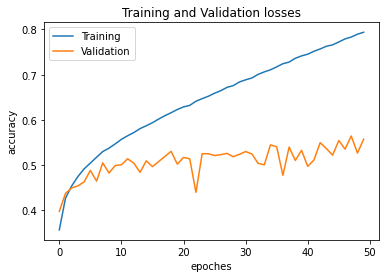

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoches')
plt.ylabel('accuracy')


Text(0, 0.5, 'loss')

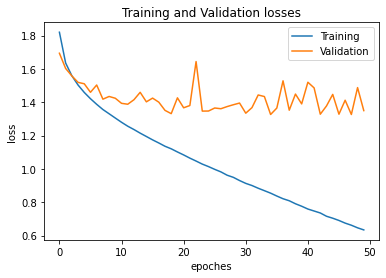

In [ ]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoches')
plt.ylabel('loss')
